<h1> ML Assignment 1</h1>

<h2>Task 1: EDA</h2>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('titanic3.xls')

#show the first 5 rows of the dataframe
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
print(df.info())  # Summary of columns, data types, and non-null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


- The summary of columns and data types tell us that that later on in the pipeline, we're going to have to handle some missing values (for the cabin and body columns per example).
- The cabin column has 1014 missing values, however it is likely not so useful for analysis.
- Some data types are object (categorical variables) such as sex, which we are going to have to encode later on.

In [5]:
print(df.describe())  # Count, mean, std, min, max, quartiles


            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


In this summary of numerical variables, we can notice that:
 - The mean of survival is only 38% and the median (50% range) is 0, therefore unfortunately more people died than     survived.
 - The class variable has a mean of 2.29, indicating that most people on the titanic were in 3rd class.
 - Most of the fares were in between 7.89 and 31.27 (most people were in 2nd and 3rd class), while a minority of people paid way higher since the mean is 33.29 and the highest fare paid is 512.32 (pushes us to think if people who paid higher prices (better class) had better chances at survival).
 - Most people traveled alone without siblings/spouses or parents/children, however the max for these two variables are 8 and 9, meaning some people had large families with them (more difficult for them to survive?).



In [6]:
print(df.describe(include=['object']))  # Summary of categorical columns


                        name   sex    ticket        cabin embarked boat  \
count                   1309  1309      1309          295     1307  486   
unique                  1307     2       939          186        3   28   
top     Connolly, Miss. Kate  male  CA. 2343  C23 C25 C27        S   13   
freq                       2   843        11            6      914   39   

           home.dest  
count            745  
unique           369  
top     New York, NY  
freq              64  


In this summary of categorical variables, we can notice that:
- Most passengers were males (843 males) which could have an impact on survival rate.
- 11 passengers shared the same ticket (C.A. 2343) indicating they're together (same family or friend group) which might have made it harder for them to survive.

In [8]:
print(df.isnull().sum())  # Count missing values per column


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


For some columns, so many values are missing and we are going to either fill in the missing values using methods or by dropping some useless columns.

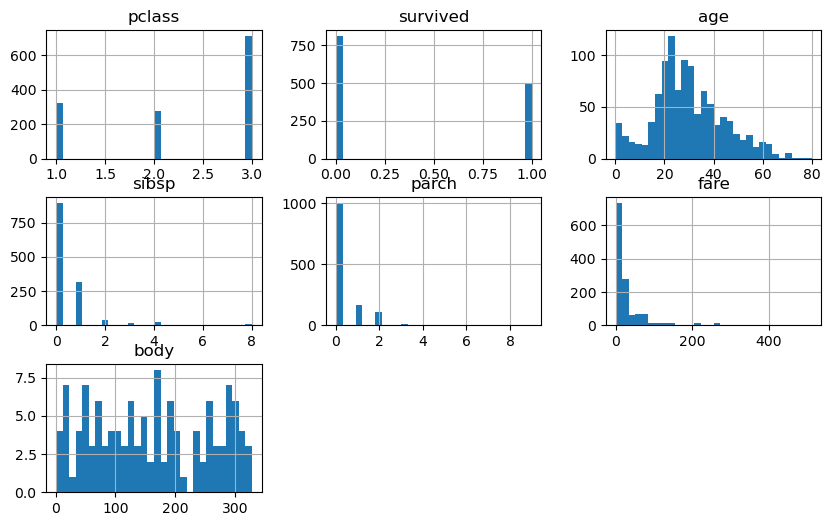

In [12]:
df.hist(figsize=(10, 6), bins=30)
plt.show()


These histograms visualizes the summary of the numerical variables.

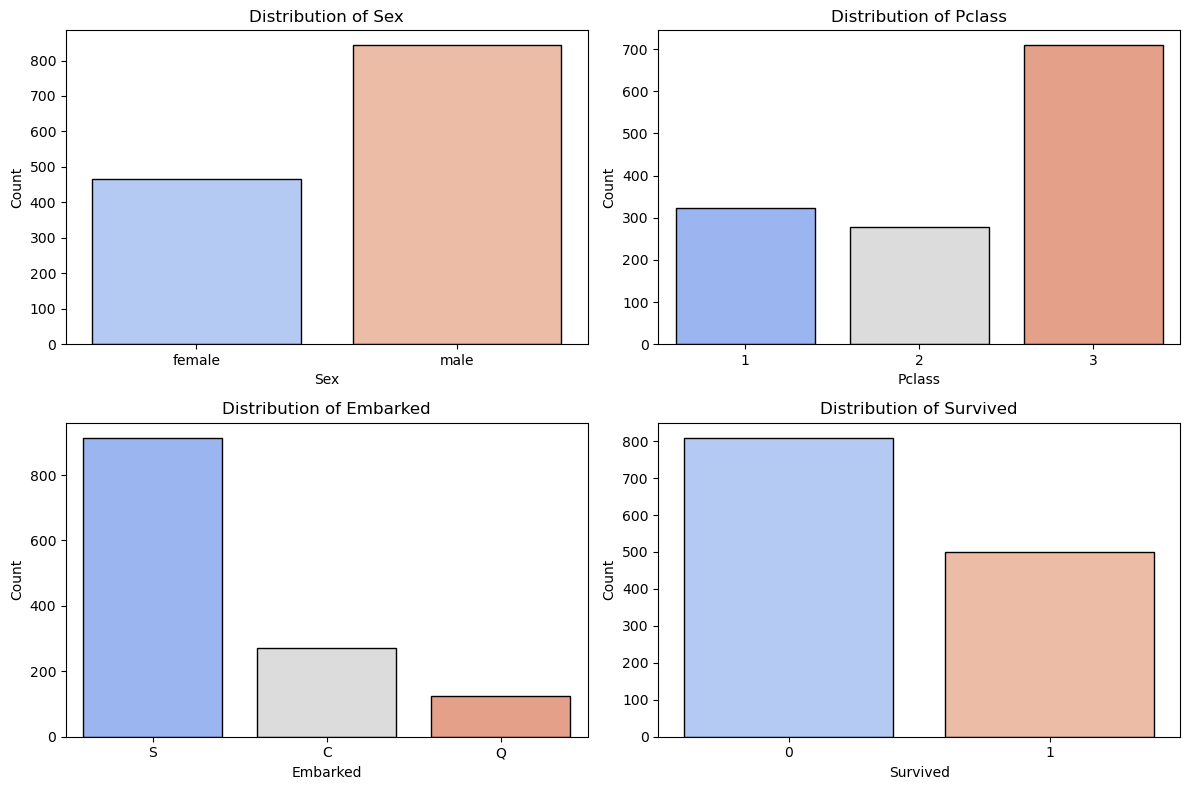

In [15]:
# Count plots for categorical variables
categorical_cols = ['sex', 'pclass', 'embarked', 'survived']

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col], palette='coolwarm', edgecolor='black')
    plt.title(f"Distribution of {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


These bar plots visualize the summary of the categorical variables.

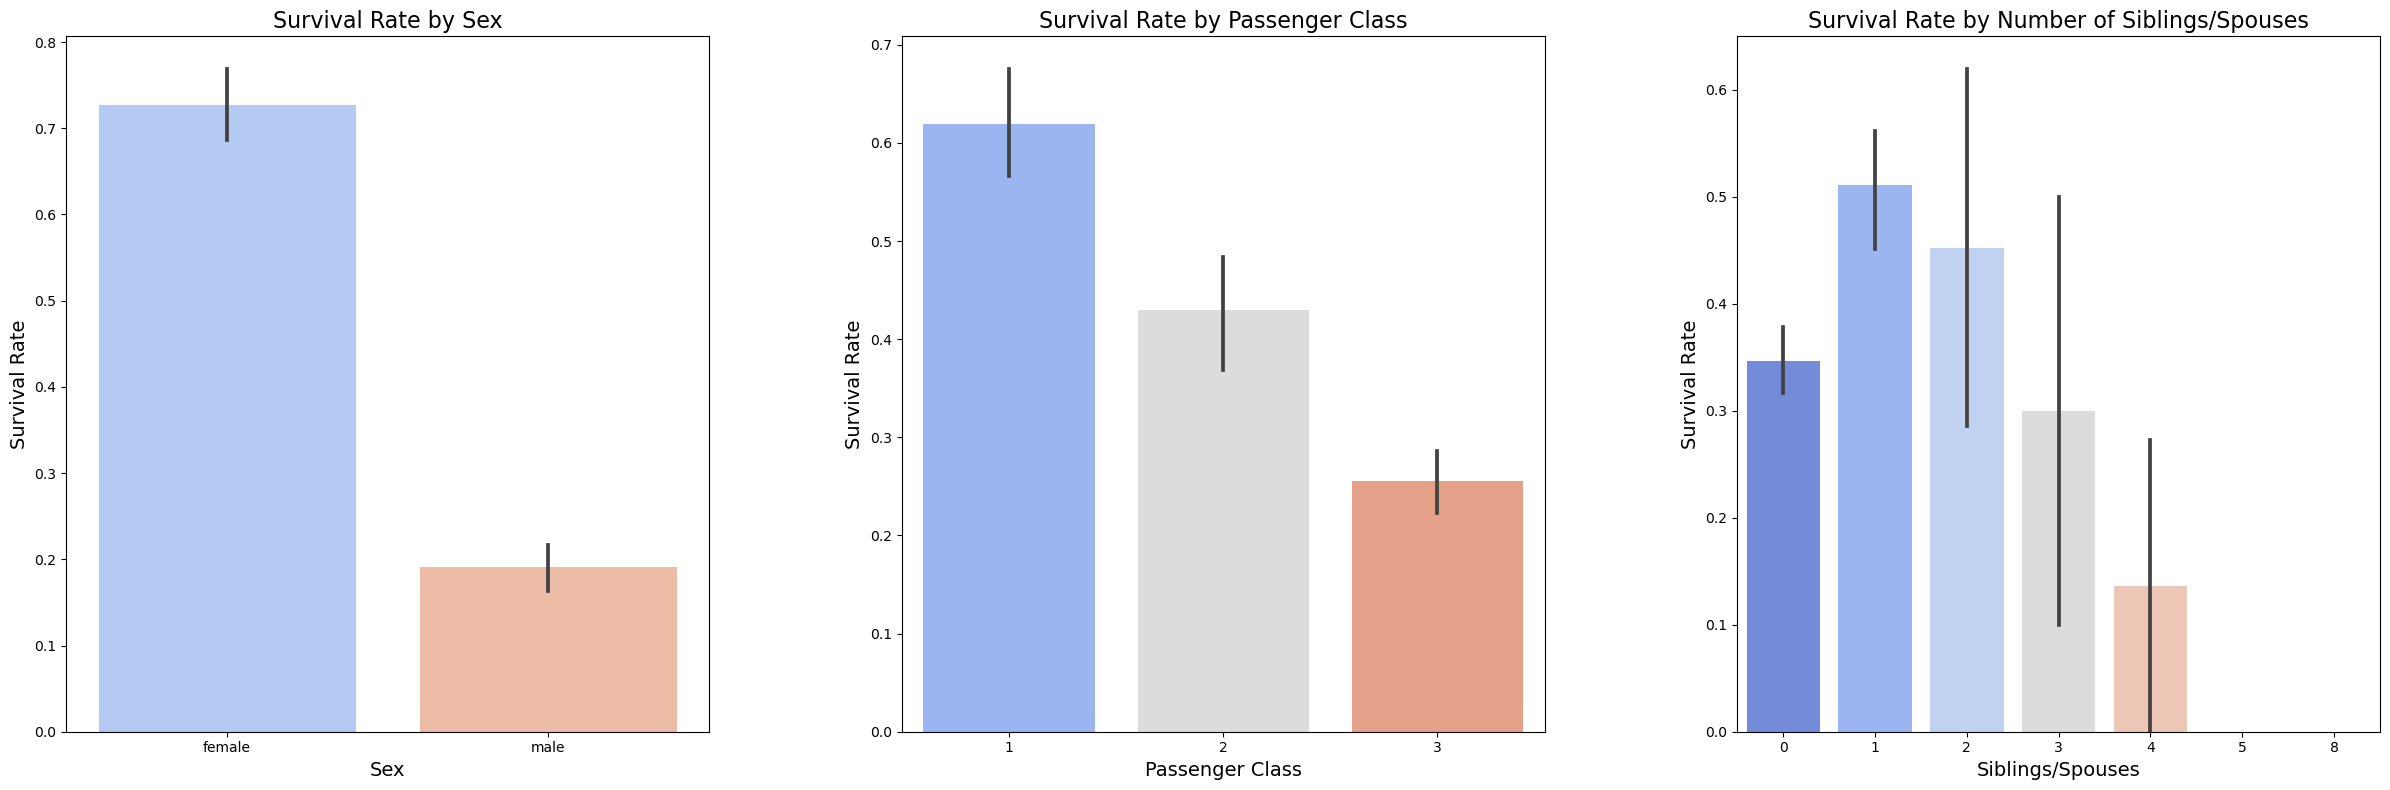

In [29]:
plt.figure(figsize=(24, 8))  # Bigger figure to improve readability

# Survival by sex
plt.subplot(1, 3, 1)
sns.barplot(x="sex", y="survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Sex", fontsize=16)  # Increase title font size
plt.ylabel("Survival Rate", fontsize=14)
plt.xlabel("Sex", fontsize=14)

# Survival by class
plt.subplot(1, 3, 2)
sns.barplot(x="pclass", y="survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Passenger Class", fontsize=16)
plt.ylabel("Survival Rate", fontsize=14)
plt.xlabel("Passenger Class", fontsize=14)

# Survival rate by number of siblings/spouses
plt.subplot(1, 3, 3)
sns.barplot(x="sibsp", y="survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Number of Siblings/Spouses", fontsize=16)
plt.ylabel("Survival Rate", fontsize=14)
plt.xlabel("Siblings/Spouses", fontsize=14)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Add spacing between subplots
plt.show()



- The first plot shows us that females had a way better chance of survival (72%) than men (20%).
- Second plot shows us that the better of a class you had (1st class), the better of a chance you had at survival.
- Third plot shows us that large families had way lower chances at survival than people with one family member. Those who had 0 family members aboard had a lower chance at survival than those with 1 or 2 family members, perhaps they had no one to help them escape.

These plots validate our previous doubts about the correlations between survival and the variables in subject.


<h2>Task 2: Managing Missing Values</h2>

In [30]:
print(df.isnull().sum())  # Count missing values per column

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


As we can see:
- Column 'age' has 263 missing values.
- Column 'fare' has only 1 missing value.
- Column 'cabin' has 1014 missing values.
- Column 'embarked' has 2 missing values.
- Column 'boat' has 823 missing values.
- Column 'body' has 1188 missing values.
- Column 'home.dest' has 564 missing values.

<h3>Age Column</h3>
Since the age of a passenger is important to predict wether they survived or not, we have to fill the missing values. The distribution of ages is right-skewed, therefore the median would be a better measure (than the mean) of the missing values. However, to be more precise, we are gonna use the grouped median based on the class and gender. That is because it is more probable that the wealthier passengers in 1st class were older men and women while the 3rd class passengers were young men.

The code to handle that:

In [31]:
df["age"].fillna(df.groupby(["pclass", "sex"])["age"].transform("median"), inplace=True)


<h3>Fare Column</h3>

Since there is only one missing value for this column, then the best thing to do is to replace it by the median of the passenger's class.

The code to handle that:

In [33]:
df["fare"].fillna(df.groupby("pclass")["fare"].transform("median"), inplace=True)


<h3>Cabin Column</h3>

For this feature, we can see that a lot of values are missing, so it would be better to just transform the whole column into a binary "Has a Cabin" feature. Most people back in the day, were not assigned cabins if they were in third class, so having a cabin or not, is in direct relationship with wether the passenger is wealthy or not (which has a correlation with survival).

This code will transform all missing values into a False boolean value (0) indicating they did not have a cabin:


In [35]:
df["has_cabin"] = df["cabin"].notna().astype(int)
df.drop(columns=["cabin"], inplace=True)


<h3>Embarked Column</h3>

We only have 2 missing values, so we are going to replace them with the most frequent port of embarkation which is Southhampton ("S").

Code to handle that:


In [37]:
df["embarked"].fillna("S", inplace=True)


<h3>Boat and Body Columns</h3>

These 2 columns should be dropped as they are useless because:
- The boat column refers to a lifeboat for survivors, therefore if the passenger isn't assigned a boat, then he did not survive.
- The body column refers to dead bodies found, therefore if the passenger is assigned one, then they did not survive.

These 2 columns indirectly leak survival information.

Code to handle that:


In [39]:
df.drop(columns=["boat", "body"], inplace=True)


<h3>Home Destination Column</h3>

This column has a lot of missing values (43%) and this feature does not help predict the survival of a passenger, therefore it will also be dropped.

The code to handle that:


In [40]:
df.drop(columns=["home.dest"], inplace=True)


<h2>Task 3: Encoding Categorical Variables</h2>

We start by dropping the name and ticket columns because they are useless for predicting survival:

In [41]:
df.drop(columns=["name", "ticket"], inplace=True)

The cabin column was previously transformed into a new binary feature.

We are going to apply One-Hot Encoding to sex and embarked:
- 'sex' becomes "sex_male" (0 = female, 1 = male).
- 'embarked' becomes "embarked_C", "embarked_Q", "embarked_S" (dummy variables). For example if a passenger embarked at Southampton then embarked_S = 1 and it is 0 elsewhere.

Code to apply the One-Hot Encoding, convert the encoded features into a dataframe and merge it with the original one:

In [43]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop="first")  # drop="first" avoids multicollinearity
encoded_data = encoder.fit_transform(df[["sex", "embarked"]])

# Convert encoded features into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["sex", "embarked"]))

# Merge encoded features into original DataFrame
df_encoded = df.drop(columns=["sex", "embarked"]).reset_index(drop=True)
df_final = pd.concat([df_encoded, encoded_df], axis=1)

# Display transformed dataset
print(df_final.head())

   pclass  survived      age  sibsp  parch      fare  has_cabin  sex_male  \
0       1         1  29.0000      0      0  211.3375          1       0.0   
1       1         1   0.9167      1      2  151.5500          1       1.0   
2       1         0   2.0000      1      2  151.5500          1       0.0   
3       1         0  30.0000      1      2  151.5500          1       1.0   
4       1         0  25.0000      1      2  151.5500          1       0.0   

   embarked_Q  embarked_S  
0         0.0         1.0  
1         0.0         1.0  
2         0.0         1.0  
3         0.0         1.0  
4         0.0         1.0  


/Users/jad/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Since ML Models don't understand categorical variables such as "male" or "female" then we need to transform them into numbers. Now, if a passenger is a male, then the new encoded feature will have the value 1, indicating to the ML Model that the passenger is a male.

"embarked" is converted into two columns (embarked_Q, embarked_S), the third column (embarked_C) is removed to prevent redundancy. If we have for a certain passenger embarked_Q, embarked_S = 0, then we know for sure that embarked_C = 1 for sure.

Our machine learning model can now use these numerical values to find patterns in the data.